# Clasificador Naive Bayes 

Los modelos Naive Bayes son un grupo de algoritmos de clasificación extremadamente rápidos y simples que a menudo son adecuados para conjuntos de datos de muy alta dimensión. Debido a que son tan rápidos y tienen  pocos parámetros ajustables, terminan siendo muy útiles como una línea de base para un problema de clasificación. 

- Funciona bien en el caso de variables de entrada categóricas comparada con variables numéricas

- EL métodos de clasificación Bayesiano se basa en el teorema de Bayes, que es una ecuación que describe la relación de probabilidades condicionales de cantidades estadísticas. estamos interesados en encontrar la probabilidad de una etiqueta dadas algunas características (features) observadas, que podemos escribir como P (R | A), donde R=feature(dado que) y A=feature(ocurra esta), asi:
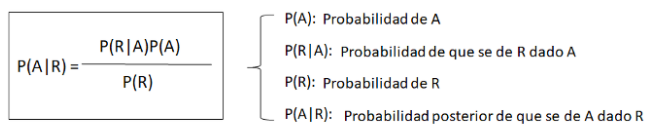



**Ejemplo**

Consideremos el caso de dos compañeros que trabajan en la misma oficina: Alicia y Bruno. Sabemos que:

* Alicia viene a la oficina 3 días a la semana.

* Bruno viene a la oficina 1 día a la semana.

`Esta sería información “anterior”. Ahora, estamos en la oficina y vemos pasar delante de nosotros a alguien muy 
rápido, tan rápido que no sabemos si es Alicia o Bruno.`


Dada la información que tenemos hasta ahora y asumiendo que solo trabajan 4 días a la semana, las probabilidades de que la persona vista sea Alicia o Bruno, son:

* P(Alicia) = 3/4 = 0.75
* P(Bruno) = 1/4 = 0.25

Cuando vimos a la persona pasar, vimos que él o ella llevaba una chaqueta roja. También sabemos lo siguiente:

>* Alicia viste de rojo 2 veces a la semana.
>* Bruno viste de rojo 3 veces a la semana.

Así que, para cada semana de trabajo, que tiene cinco días, podemos inferir lo siguiente:

>* La probabilidad de que Alicia vista de rojo es → P(Rojo|Alicia) = 2/5 = 0.4
>* La probabilidad de que Bruno vista de rojo → P(Rojo|Bruno) = 3/5 = 0.6

Entonces, con esta información, **¿a quién vimos pasar?** (en forma de probabilidad). Esta nueva probabilidad será la información ‘posterior’.

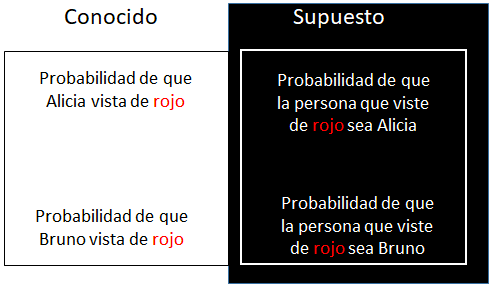

`Inicialmente conocíamos las probabilidades P(Alicia) y P(Bruno), y después inferíamos las probabilidades de P(rojo|Alicia) y P(rojo|Bruno).`

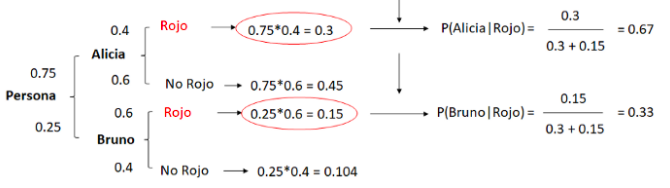

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

datos = pd.read_csv('Iris.csv')

datos




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploración de datos 

In [2]:
datos['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
#eliminar el ID, no sirve para este caso 
dato1 = datos.drop(columns="Id","a",inplace=True)

In [4]:
datos.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

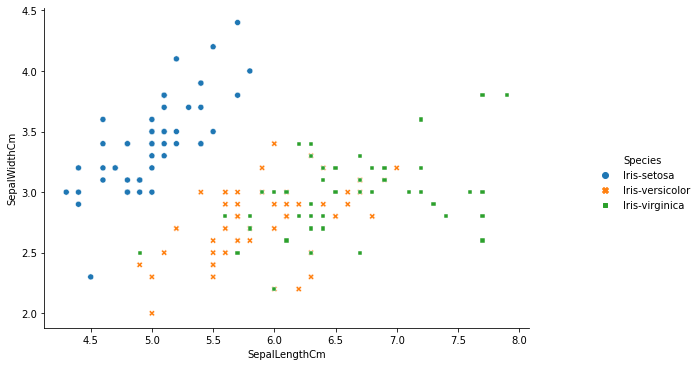

In [5]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=datos,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

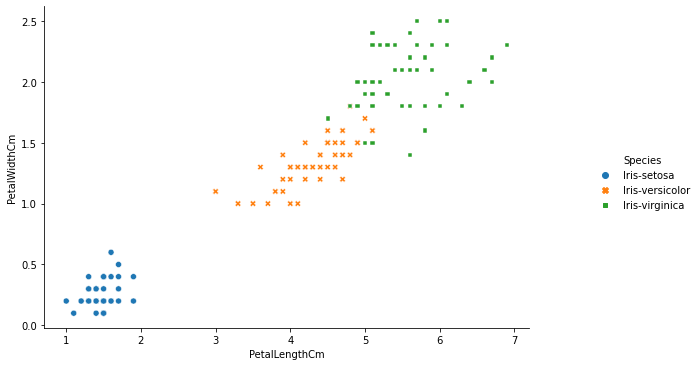

In [6]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=datos,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

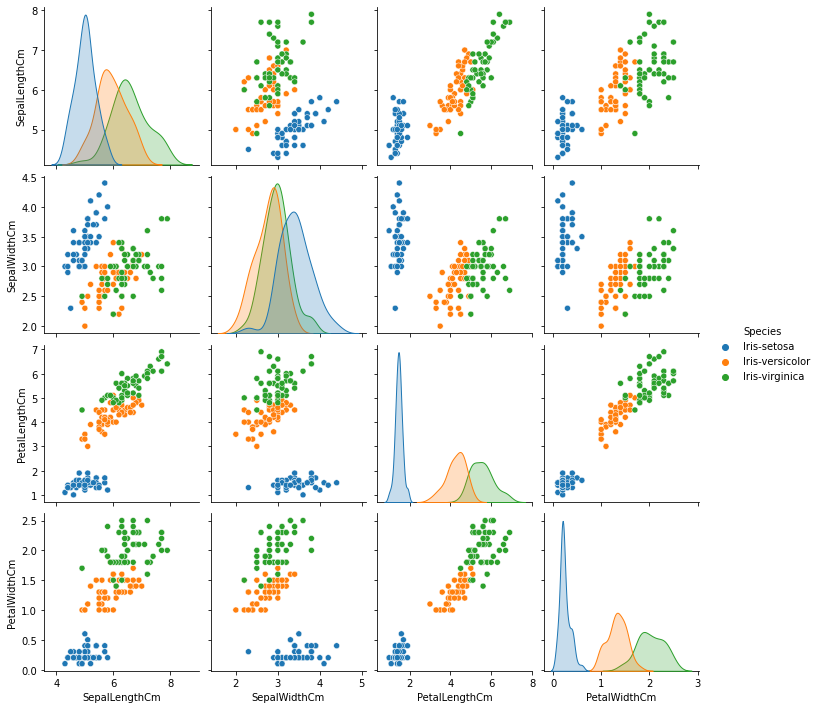

In [7]:
sns.pairplot(datos,hue="Species")
plt.show()


#  Distribución de curva de Gauss (normal) - Naive Bayes gausiano

In [8]:
from scipy.stats import norm
IrisSetosa= datos[(datos['Species']=='Iris-setosa')]
IrisVersicolor= datos[(datos['Species']=='Iris-versicolor')]
IrisVirginica= datos[(datos['Species']=='Iris-virginica')]
print('Iris-setosa: %i\nIris-versicolor: %i\nIris-virginica: %i'%(
    len(IrisSetosa),len(IrisVersicolor), len(IrisVirginica)))

Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


In [9]:
#gauss
dt=(IrisSetosa, IrisVersicolor,IrisVirginica)
lSigma=[]
lMu=[]
lMin=[]
lMax=[]
for df in dt:
    lSigma.append(list(df.std()))
    lMu.append(list(df.mean()))
    lMin.append(list(df.min()))
    lMax.append(list(df.max()))
clases=list(datos.Species.unique())
featuresGauss= list(datos)[:-1]
featuresGauss

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

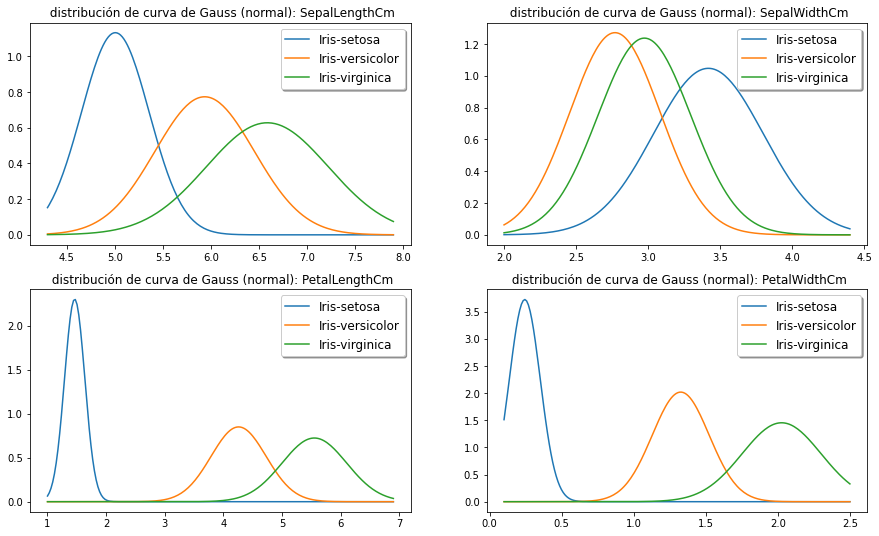

In [10]:
fig = plt.figure(1,figsize=(15,9))
for d in range(len(featuresGauss)):
    sigma=[x[d] for x in lSigma]
    mu= [x[d] for x in lMu]
    maximo=[x[d] for x in lMax]
    maximo=max(maximo)
    minimo=[x[d] for x in lMin]
    minimo=min(minimo)
    rng = np.linspace(minimo,maximo,200)
    ax = fig.add_subplot(2,2,d+1)
    for i in range(len(mu)):
        dist=norm(mu[i],sigma[i])
        ax.plot(rng, dist.pdf(rng),label=clases[i])
    legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
    ax.set_title(' distribución de curva de Gauss (normal): %s'%featuresGauss[d])
plt.show()

In [11]:
#dividir el dataset 
X=datos.iloc[:,0:4].values
y=datos.iloc[:,4].values  

In [12]:
# convertir etiquetas a números 
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y) 


# Ahora dividamos los datos en un conjunto de entrenamiento y validación.

In [13]:
train, test = train_test_split(datos, test_size=0.2, random_state=42)

In [18]:

X_train = train[['SepalLengthCm']
y_train=train.Species
X_test= test[['SepalLengthCm']] 
y_test =test.Species  

'''
X_train = train[['SepalLengthCm','SepalWidthCm']]
y_train=train.Species
X_test= test[['SepalLengthCm','SepalWidthCm']] 
y_test =test.Species  
'''


"\nX_train = train[['SepalLengthCm','SepalWidthCm']]\ny_train=train.Species\nX_test= test[['SepalLengthCm','SepalWidthCm']] \ny_test =test.Species  \n"

# Modelo Naive Bayes 

In [20]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas de diagnóstico


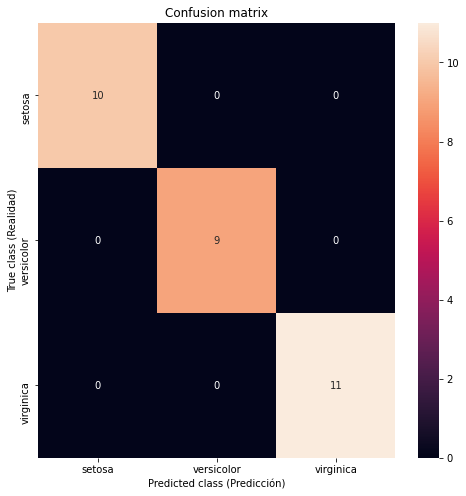

In [21]:

LABELS = ["setosa", "versicolor", "virginica"]
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class (Realidad)')
    plt.xlabel('Predicted class (Predicción)')
    plt.show()
    #print (classification_report(y_test, y_pred))

y_pred = modelo.predict(X_test)
mostrar_resultados(y_test, y_pred)

In [22]:
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
acc_gaussian = round(modelo.score(X_train, y_train) * 100, 2)

accuracy = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))

print('accuracy_Naive Bayes: %.1f' %accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

accuracy_Naive Bayes: 1.0


# Probar el modelo

In [24]:
print (modelo.predict([[5.1,3.5,1.4,0.2]])) 
#print (modelo.predict([[6.1,3.0]]))
#print (modelo.predict([[6.7,3.0]]))
#print (modelo.predict([[5.3,3.5]]))



['Iris-setosa']


# Probabiliades de que sea uno de los tipos de flor

In [25]:
datos

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
records = []
for i in range(100, 150):
    records.append([str(datos.values[i, j]) for j in range(0, 5)])

from apyori import apriori
#probabilities
prob = apriori(records, min_support=0.0045, min_confidence=0.1, min_lift=3, min_length=2)
prob_results = list(prob)


for item in prob_results:
    # primer índice de la lista interna
    # Contiene un elemento base y agrega un elemento
    pair = item[0]
    items = [x for x in pair]
    #print("Regla: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Settosa: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Versicolor: " + str(item[2][0][2]))
    print("Virginica: " + str(item[2][0][3]))
    print("=====================================")

Settosa: 0.006711409395973154
Versicolor: 0.16666666666666669
Virginica: 6.208333333333334
Settosa: 0.026845637583892617
Versicolor: 0.6666666666666667
Virginica: 3.820512820512821
Settosa: 0.020134228187919462
Versicolor: 0.5
Virginica: 6.208333333333334
Settosa: 0.006711409395973154
Versicolor: 0.16666666666666669
Virginica: 6.208333333333334
Settosa: 0.006711409395973154
Versicolor: 0.16666666666666669
Virginica: 8.277777777777779
Settosa: 0.020134228187919462
Versicolor: 0.5
Virginica: 6.7727272727272725
Settosa: 0.006711409395973154
Versicolor: 0.16666666666666669
Virginica: 4.138888888888889
Settosa: 0.040268456375838924
Versicolor: 1.0
Virginica: 3.040816326530612
Settosa: 0.18120805369127516
Versicolor: 1.0
Virginica: 3.040816326530612
Settosa: 0.020134228187919462
Versicolor: 0.42857142857142855
Virginica: 3.3609022556390973
Settosa: 0.006711409395973154
Versicolor: 0.14285714285714285
Virginica: 3.5476190476190474
Settosa: 0.013422818791946308
Versicolor: 0.2857142857142857
V

In [ ]:
prob_results

## Conclusiones del modelo 

NBC son bastante fáciles de implementar. Son excelentes para usar como línea de base con la que puede comparar otros modelos más complejos. En este caso, la precisión es  muy buena. 

Pero puede mejorar la precisión realizando algunas funciones de ingeniería. Un enfoque simple sería agregar algunas características como (por ejemplo: petalos y sepalos). ¡La precisión mejorará!
